# Get open source data

We will use the well known "Chicago Taxi Dataset"

### 0.1.0 Download it from the official source

In [1]:
### First create a local folder to handle data
!mkdir chicagodata

In [2]:
# Get the dataset Taxi Trips as CSV
!curl --get 'https://data.cityofchicago.org/resource/wrvz-psew.csv' \
  --data-urlencode '$limit=10000' \
  --data-urlencode '$where=trip_start_timestamp >= "2019-01-01" AND trip_start_timestamp < "2019-02-01"' \
  --data-urlencode '$select=tips,trip_start_timestamp,trip_seconds,trip_miles,pickup_community_area,pickup_centroid_latitude,pickup_centroid_longitude,dropoff_community_area,fare,tolls,extras,trip_total' \
  | tr -d '"' > "./chicagodata/trip.csv"

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 1087k    0 1087k    0     0  21035      0 --:--:--  0:00:52 --:--:--  252k


### 0.1.1 Quick analysis

In [2]:
### import depandancies
import pandas as pd
import seaborn as sns

In [3]:
### read data using pandas reader with appropriate type 
data = ...

In [4]:
### Use pandas to see first lines of the data
data. ...

,tips,trip_start_timestamp,trip_seconds,trip_miles,pickup_community_area,pickup_centroid_latitude,pickup_centroid_longitude,dropoff_community_area,fare,tolls,extras,trip_total
0,0.0,2019-01-31T23:45:00.000,746.0,3.34,6.0,41.944227,-87.655998,16.0,11.75,0.0,0.0,11.75
1,0.0,2019-01-31T23:45:00.000,681.0,3.00,8.0,41.899602,-87.633308,24.0,11.25,0.0,0.0,11.25
2,11.0,2019-01-31T23:45:00.000,2280.0,15.20,56.0,41.792592,-87.769615,22.0,39.00,0.0,5.0,55.00
3,2.0,2019-01-31T23:45:00.000,360.0,1.20,8.0,41.899602,-87.633308,32.0,6.50,0.0,0.0,8.50
4,8.4,2019-01-31T23:45:00.000,1500.0,11.50,76.0,41.980264,-87.913625,4.0,29.75,0.0,4.0,42.15


In [6]:
#describe and inspect data distribution for the numerical columns
numerical_data = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
data. ...

,tips,trip_seconds,trip_miles,pickup_community_area,pickup_centroid_latitude,pickup_centroid_longitude,dropoff_community_area,fare,tolls,extras,trip_total
count,10000.000000,9998.000000,10000.000000,9325.000000,9325.000000,9325.000000,8906.000000,10000.000000,9372.000000,10000.000000,10000.000000
mean,2.437964,933.270054,4.606100,32.942842,41.907930,-87.694160,19.108803,16.716884,0.002438,1.790519,21.090642
std,3.612189,1854.206975,6.352033,25.095238,0.045981,0.110402,16.609156,43.089965,0.081187,5.220788,45.271295
min,0.000000,0.000000,0.000000,1.000000,41.690633,-87.913625,1.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,360.000000,0.600000,8.000000,41.880994,-87.695013,8.000000,6.000000,0.000000,0.000000,7.500000
50%,1.000000,600.000000,1.490000,32.000000,41.892508,-87.633308,8.000000,8.750000,0.000000,0.000000,10.750000
75%,3.000000,1260.750000,5.790000,32.000000,41.944227,-87.626215,28.000000,22.250000,0.000000,1.500000,26.500000
max,69.000000,71399.000000,73.020000,77.000000,42.009623,-87.534903,77.000000,4003.970000,4.000000,99.500000,4004.370000


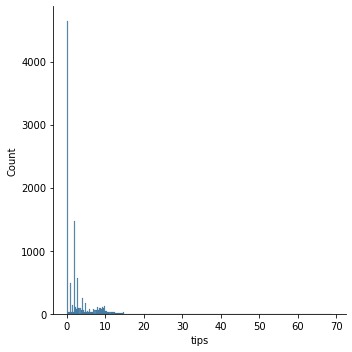

In [24]:
#Using seaborn, plot the distribution of continuous variable : tips  
sns. ...

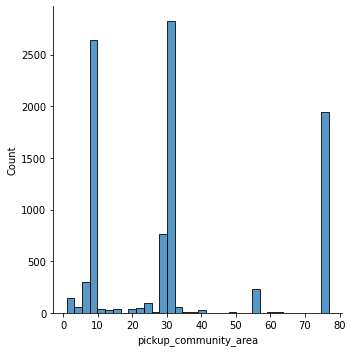

In [15]:
#Using seaborn, plot the distribution of categorical variable : pickup_community_area  
sns.displot(data, x="pickup_community_area")

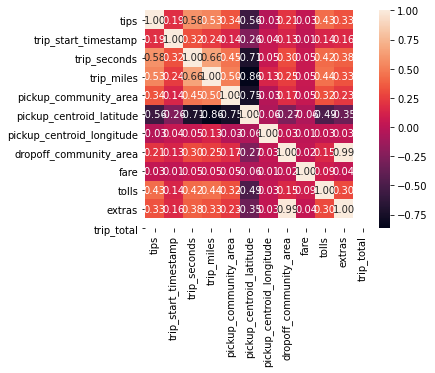

In [26]:
### Using seaborn heatmap, plot the correlation matrix of the current dataset
correlation = data. ...
hm = sns.heatmap(correlation, 
                 cbar=True, 
                 annot=True, 
                 square=True, 
                 fmt='.2f', 
                 yticklabels= ..., 
                 xticklabels= ...)

**Feel free to add any vizualization, description that will help you to summerize the data**

**Now we got a first understanding of the data, we want to store it for later uses**

### 0.1.2 storage

We will use `MinIO`, to store our dataset.Take a look at https://storage.course.aiengineer.sandbox-atos.com/login

#### Use the minio client

In [28]:
# import dependancies
from minio import Minio
import urllib3

In [43]:
## Create a client with the access key and the secret key given
client = Minio(
    "storage-api.course.aiengineer.sandbox-atos.com",
    access_key="XXX",
    secret_key="XXX",
    secure=True,
    http_client=urllib3.PoolManager(
        
        retries=urllib3.Retry(
            total=5,
            backoff_factor=0.2,
            status_forcelist=[500, 502, 503, 504],
        ),
    ),
)

In [44]:
### Using the minio documentation, list and print buckets
buckets = client. ...
for ...

argoworkflow-logs 2022-11-09 13:13:33.030000+00:00
damienorset 2022-11-10 10:44:50.035000+00:00
data-platform 2022-11-09 13:13:32.767000+00:00
guillaumestorage 2022-11-09 21:49:37.743000+00:00


In [ ]:
## define a bucket name like your credentials : firstname-lastname
# this bucket has already been created for you before the lab
bucket= ...

#### Put taxi dataset into your bucket

In [50]:
!pip install pyarrow

     |████████████████████████████████| 36.0 MB 11 kB/s /s eta 0:00:01


In [51]:
# import depandancies
from io import BytesIO
import pyarrow

In [55]:
### We will persist using "parquet" instead of csv for encoding/typing purpose
### convert data to parquet using pandas (if you struggle with the parquet engine used by pandas, choose pyarrow)
parquet_bytes=data. ...

### Use BytesIO to wrap parquet into a bytes stream objetc
parquet_buffer = BytesIO(...)

In [58]:
### Define the path to your chicago taxi dataset (intermediate folders are created automatically)
path_minio="datasets/chicago/trips.parquet"

In [59]:
### put the parquet file
### fill the params with the put_object documentation
client.put_object(  ...,
                    ...,
                    ...,
                    length=len(parquet_bytes),
                    ...)

('37d3da7468b36bb3ca4cb61eaeede216', None)

#### Verify it's stored

In [64]:
### use the api to list objects into the bucket
objects = client....
...

<Object: bucket_name: guillaumestorage object_name: b'datasets/chicago/trips.parquet' version_id: None last_modified: 2022-12-02 15:25:54.542000+00:00 etag: 37d3da7468b36bb3ca4cb61eaeede216 size: 138492 content_type: None is_dir: False metadata: None >
